# Call Libraries

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

from sklearn.metrics import accuracy_score, precision_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input

# Load dataset

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Data exploration

In [9]:
len(np.unique(train_labels))
np.unique(test_labels)

10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**There are 10 different classes of target**

In [10]:
train_images.shape
test_images.shape

(60000, 28, 28)

(10000, 28, 28)

There are 60000 records in the training dataset<br>
There are 10000 records in the test dataset

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

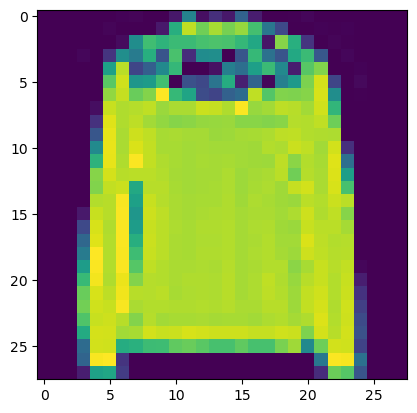

In [16]:
plt.figure()
plt.imshow(train_images[1562])
plt.grid(False)
plt.show();

In [17]:
class_names[train_labels[1562]]

'Shirt'

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

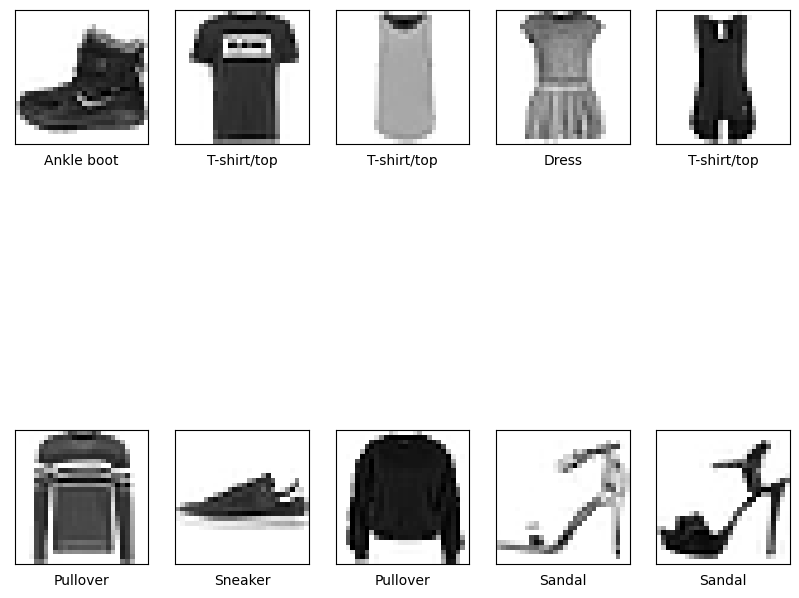

In [126]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show();

# Model with 'Adam' optimizer

In [41]:
keras.backend.clear_session()
model = tf.keras.Sequential() 
model.add(Input(shape=(28, 28,1)),)
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',strides=1))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 92s 48ms/step - loss: 0.6236 - accuracy: 0.7709
Epoch 2/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.3881 - accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.3346 - accuracy: 0.8797
Epoch 4/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3022 - accuracy: 0.8906
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2782 - accuracy: 0.8998
Epoch 6/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2643 - accuracy: 0.9047
Epoch 7/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2464 - accuracy: 0.9099
Epoch 8/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2341 - accuracy: 0.9152
Epoch 9/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2268 - accuracy: 0.9175
Epoch 10/10
1875/1875 [==============================] - 71s 38m

In [19]:
predictions = model.predict(test_images)

predicted = []
for i in range(test_labels.size):
    predicted.append(np.argmax(predictions[i]))

313/313 [==============================] - 3s 10ms/step


In [21]:
np.sum((test_labels == predicted))/test_labels.size 

0.9076

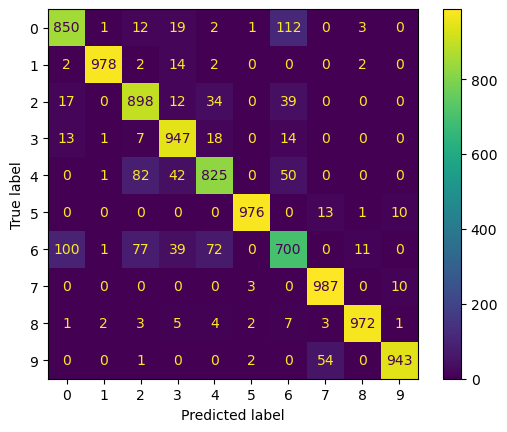

In [22]:
confusion_matrix = metrics.confusion_matrix(test_labels, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show();

In [30]:
accuracy = accuracy_score(test_labels, predicted,normalize=True)
print("Accuracy   :", accuracy)


Accuracy   : 0.9076


* This model produced 90.7% accuacy.
* From the confusion matrix it can be seen that the model has done well predicting items across all class of items , with most wrong predictions for sneakers class

# Model with 'Adadelta' optimizer

In [31]:
keras.backend.clear_session()
model = tf.keras.Sequential() 
model.add(Input(shape=(28, 28,1)),)
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',strides=1))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1917 - accuracy: 0.9290
Epoch 2/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1884 - accuracy: 0.9312
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1870 - accuracy: 0.9323
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1858 - accuracy: 0.9307
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1844 - accuracy: 0.9325
Epoch 6/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1829 - accuracy: 0.9325
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1826 - accuracy: 0.9330
Epoch 8/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1829 - accuracy: 0.9336
Epoch 9/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1804 - accuracy: 0.9332
Epoch 10/10
1875/1875 [==============================] - 71s 38m

In [33]:
predictions = model.predict(test_images)

predicted = []
for i in range(test_labels.size):
    predicted.append(np.argmax(predictions[i]))

313/313 [==============================] - 3s 11ms/step


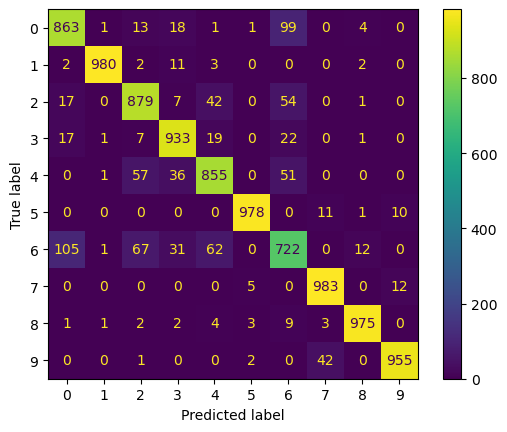

In [34]:
confusion_matrix = metrics.confusion_matrix(test_labels, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show();

In [35]:
np.sum((test_labels == predicted))/test_labels.size 

0.9123

In [36]:
accuracy = accuracy_score(test_labels, predicted,normalize=True)
print("Accuracy   :", accuracy)

Accuracy   : 0.9123


* This model has done better than 'Adam' with 91.2% accuracy<br>
* The prediction for sneakers has also been better than that of 'Adam' <br>
* Predictions for sneakers has been the worst among the predictions of all items made.

# Model with 'Adagrad' optimizer

In [42]:
keras.backend.clear_session()
model = tf.keras.Sequential() 
model.add(Input(shape=(28, 28,1)),)
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',strides=1))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 75s 39ms/step - loss: 2.0688 - accuracy: 0.2500
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 1.3310 - accuracy: 0.4949
Epoch 3/10
1875/1875 [==============================] - 74s 39ms/step - loss: 1.1232 - accuracy: 0.5681
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 1.0202 - accuracy: 0.6099
Epoch 5/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.9459 - accuracy: 0.6442
Epoch 6/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.8901 - accuracy: 0.6664
Epoch 7/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.8436 - accuracy: 0.6851
Epoch 8/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.8043 - accuracy: 0.7004
Epoch 9/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.7753 - accuracy: 0.7117
Epoch 10/10
1875/1875 [==============================] - 66s 35m

In [43]:
predictions = model.predict(test_images)

predicted = []
for i in range(test_labels.size):
    predicted.append(np.argmax(predictions[i]))

313/313 [==============================] - 3s 10ms/step


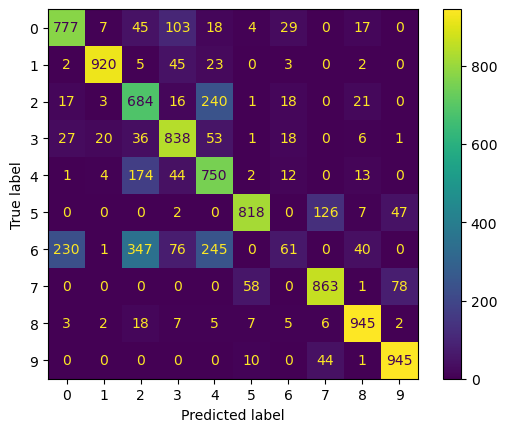

In [44]:
confusion_matrix = metrics.confusion_matrix(test_labels, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show();

In [46]:
np.sum((test_labels == predicted))/test_labels.size 


accuracy = accuracy_score(test_labels, predicted,normalize=True)
print("Accuracy   :", accuracy)

0.7601

Accuracy   : 0.7601


In [149]:
class_names[4]

'Coat'

* This model has done poorly with only 76.01% accuracy<br>
* Along with sneakers the model has done poorly while predicting for coat<br>
* The predictions for Sneakers have been very poor

# Model with 'RMSprop' optimizer

In [50]:
keras.backend.clear_session()
model = tf.keras.Sequential() 
model.add(Input(shape=(28, 28,1)),)
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',strides=1))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 71s 37ms/step - loss: 0.5982 - accuracy: 0.7845
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3718 - accuracy: 0.8687
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3327 - accuracy: 0.8834
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3138 - accuracy: 0.8907
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2978 - accuracy: 0.8981
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3003 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3039 - accuracy: 0.8960
Epoch 8/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3039 - accuracy: 0.8978
Epoch 9/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3157 - accuracy: 0.8946
Epoch 10/10
1875/1875 [==============================] - 67s 36m

In [51]:
predictions = model.predict(test_images)

predicted = []
for i in range(test_labels.size):
    predicted.append(np.argmax(predictions[i]))

313/313 [==============================] - 3s 10ms/step


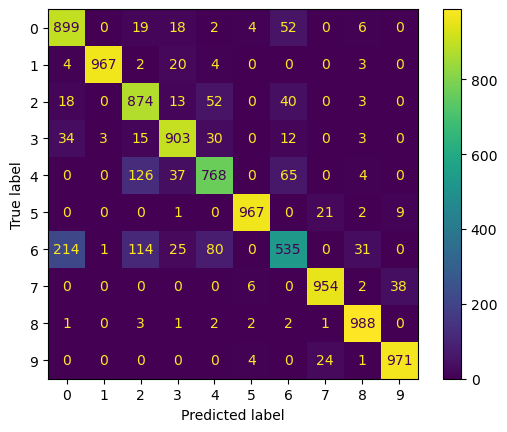

In [52]:
confusion_matrix = metrics.confusion_matrix(test_labels, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show();

In [53]:
np.sum((test_labels == predicted))/test_labels.size 


accuracy = accuracy_score(test_labels, predicted,normalize=True)
print("Accuracy   :", accuracy)

0.8826

Accuracy   : 0.8826


* This model has shown accuracy of 88.26% which is better than model using 'Adagrad'<br>
* Along with sneakers the model has done poorly predicting for coat<br>

# Model with 'SGD' optimizer

In [54]:
keras.backend.clear_session()
model = tf.keras.Sequential() 
model.add(Input(shape=(28, 28,1)),)
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',strides=1))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 70s 37ms/step - loss: 1.4275 - accuracy: 0.4633
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.7861 - accuracy: 0.7032
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.6613 - accuracy: 0.7527
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.5945 - accuracy: 0.7783
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.5510 - accuracy: 0.7941
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.5199 - accuracy: 0.8073
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.4900 - accuracy: 0.8201
Epoch 8/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.4674 - accuracy: 0.8288
Epoch 9/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.4456 - accuracy: 0.8403
Epoch 10/10
1875/1875 [==============================] - 67s 36m

In [55]:
predictions = model.predict(test_images)

predicted = []
for i in range(test_labels.size):
    predicted.append(np.argmax(predictions[i]))

313/313 [==============================] - 3s 11ms/step


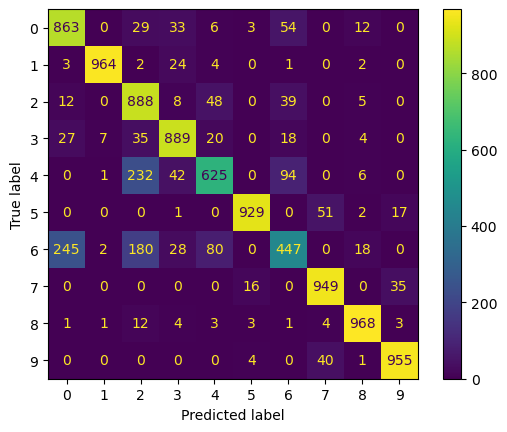

In [56]:
confusion_matrix = metrics.confusion_matrix(test_labels, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show();

In [57]:
np.sum((test_labels == predicted))/test_labels.size 


accuracy = accuracy_score(test_labels, predicted,normalize=True)
print("Accuracy   :", accuracy)

0.8477

Accuracy   : 0.8477


* The accuracy has not been as good as 'Adam' and 'Adadelta' with accuracy of only 84.77%<br>
* predictions have been poor for sneakers and coat



# Model with 'Adamax' optimizer

In [58]:
keras.backend.clear_session()
model = tf.keras.Sequential() 
model.add(Input(shape=(28, 28,1)),)
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',strides=1))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 69s 36ms/step - loss: 0.8296 - accuracy: 0.6963
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.5127 - accuracy: 0.8147
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.4344 - accuracy: 0.8455
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.3857 - accuracy: 0.8627
Epoch 5/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3544 - accuracy: 0.8744
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3292 - accuracy: 0.8833
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3096 - accuracy: 0.8881
Epoch 8/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2944 - accuracy: 0.8952
Epoch 9/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2828 - accuracy: 0.8979
Epoch 10/10
1875/1875 [==============================] - 68s 37m

In [59]:
predictions = model.predict(test_images)

predicted = []
for i in range(test_labels.size):
    predicted.append(np.argmax(predictions[i]))

313/313 [==============================] - 3s 11ms/step


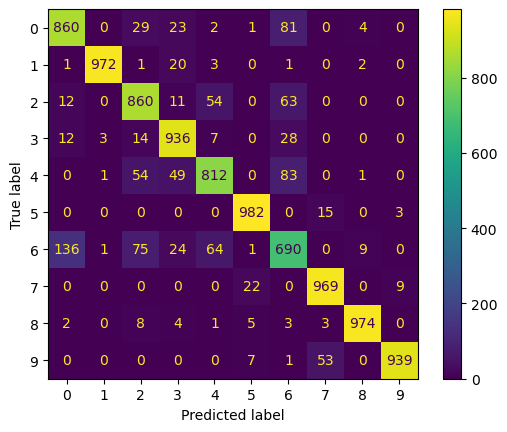

In [60]:
confusion_matrix = metrics.confusion_matrix(test_labels, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show();

In [61]:
np.sum((test_labels == predicted))/test_labels.size 


accuracy = accuracy_score(test_labels, predicted,normalize=True)
print("Accuracy   :", accuracy)

0.8994

Accuracy   : 0.8994


* This model produced an accuract of 89.94% <br>
* The predictions for sneakers have not been the best

# Model with 'Ftrl' optimizer

In [73]:
keras.backend.clear_session()
model = tf.keras.Sequential() 
model.add(Input(shape=(28, 28,1)),)
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',strides=1))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Ftrl', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 70s 36ms/step - loss: 2.3026 - accuracy: 0.0992
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 72s 38ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 8/10
1875/1875 [==============================] - 70s 37ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 9/10
1875/1875 [==============================] - 71s 38ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 10/10
1875/1875 [==============================] - 69s 37m

In [74]:
predictions = model.predict(test_images)

predicted = []
for i in range(test_labels.size):
    predicted.append(np.argmax(predictions[i]))

313/313 [==============================] - 3s 10ms/step


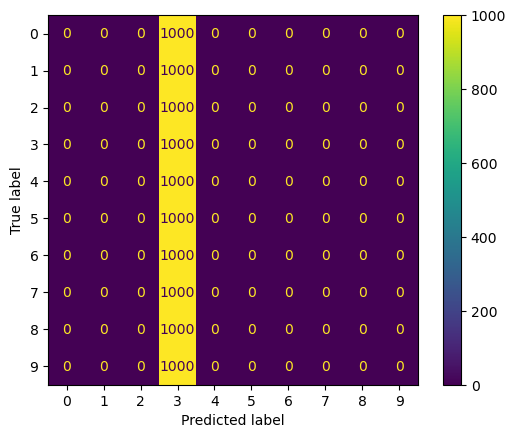

In [75]:
confusion_matrix = metrics.confusion_matrix(test_labels, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show();

In [76]:
np.sum((test_labels == predicted))/test_labels.size 


accuracy = accuracy_score(test_labels, predicted,normalize=True)
print("Accuracy   :", accuracy)

0.1

Accuracy   : 0.1


* This model has had the worst accuracy of 10%<br>
* However , it accuract has been 100% in predicting the item 'Dress'<br>
* The predictions for all other 9 items have been zero.

# Model with 'Nadam' optimizer

In [77]:
keras.backend.clear_session()
model = tf.keras.Sequential() 
model.add(Input(shape=(28, 28,1)),)
model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',strides=1))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 71s 37ms/step - loss: 0.6016 - accuracy: 0.7798
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3705 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3167 - accuracy: 0.8867
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2860 - accuracy: 0.8961
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2654 - accuracy: 0.9034
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2504 - accuracy: 0.9089
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2376 - accuracy: 0.9130
Epoch 8/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2254 - accuracy: 0.9175
Epoch 9/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2160 - accuracy: 0.9205
Epoch 10/10
1875/1875 [==============================] - 68s 36m

In [78]:
predictions = model.predict(test_images)

predicted = []
for i in range(test_labels.size):
    predicted.append(np.argmax(predictions[i]))

313/313 [==============================] - 3s 10ms/step


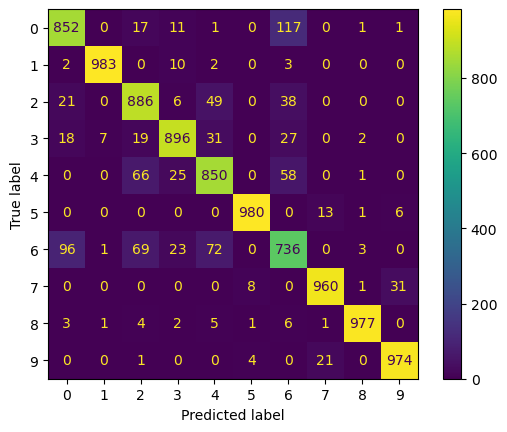

In [79]:
confusion_matrix = metrics.confusion_matrix(test_labels, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show();

In [80]:
np.sum((test_labels == predicted))/test_labels.size 


accuracy = accuracy_score(test_labels, predicted,normalize=True)
print("Accuracy   :", accuracy)

0.9094

Accuracy   : 0.9094


* The model using 'Nadam' has done very well with accuracy of 90.94%<br>
* The accuracy for the items 'Sneakers' has been the best among all the 8 optimizers used for the model.<br>
* This optimized has given the best accuracy across the classes of items although the overall accuracy is marginally lower than that of the model using the optimizer 'Adadelta'

**Conclusion : The model has performed the best when optimizers 'Nadam' , 'Adadelta' and 'Adam' have been used.**